# Un espace courbe

En 1887, Thomas Corwin Mendenhall publie un article dans *Science*, "[The Characteristic Curves of Composition](https://www.science.org/doi/10.1126/science.ns-9.214S.237)", dans lequel il avance que non seulement le style d’un auteur est régulier tout au long d’une de ses œuvres mais qu’il se retrouve en plus dans l’ensemble de ses ouvrages. Afin de le prouver, il retient comme mesure la longueur des mots dont la distribution révèlerait une signature caractéristique.

Cet exercice vous amènera à manipuler la segmentation d’un texte en tokens avant de les répartir dans plusieurs ensembles pour analyser la distribution de leurs fréquences selon une condition : le nombre de leurs caractères.

Commencez par charger quelques bibliothèques nécessaires ainsi que le texte du roman *Dracula* de Bram Stoker :

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

with open('../data/dracula.txt') as f:
    text = f.read()

## Tokenisation du texte

Constituez dans une variable `words` la liste des mots du roman :

In [2]:
# your code here

import string
from nltk.tokenize import word_tokenize

# split into words
words = word_tokenize(text)

# lower-case
words = list(map(str.lower, words))

# remove punctuation
words = list(filter(lambda x: x not in string.punctuation, words))

## Division d’une liste en parties égales

Scindez la variable `words` en une liste de *n* parties, de telle manière que chaque partie soit constituée de 5000 mots, et enregistrez le résultat dans une variable `parts` :

In [3]:
# your code here

# split word list into equal parts
n = 5000
nb_words = len(words)

parts = [
    words[i : i + n]
    for i in range(0, nb_words, n)
]

## Un dictionnaire des fréquences d’occurrences

Concevez une fonction qui transforme une liste d’occurences en dictionnaire de fréquences conditionnelles. Comme condition, optez pour la longueur des mots. La classe `ConditionalFreqDist` du module `nltk.probability` est tout indiquée :

In [10]:
# your code here

from nltk.probability import ConditionalFreqDist

def frequencies(l):
    """Frequency distribution under conditions from a sequence."""
    return ConditionalFreqDist(
        (len(element), element)
        for element in l
    )

## Une liste des distributions des fréquences

Pour chaque partie de votre collection `parts`, obtenez un dictionnaire de la distribution des fréquences. Enregistrez le tout dans une liste `frequencies` qui sera triée par longueur de mots (les conditions) :

In [16]:
# your code here

occurrences = [
    sorted(frequencies(part).items())
    for idx, part in enumerate(parts)
]

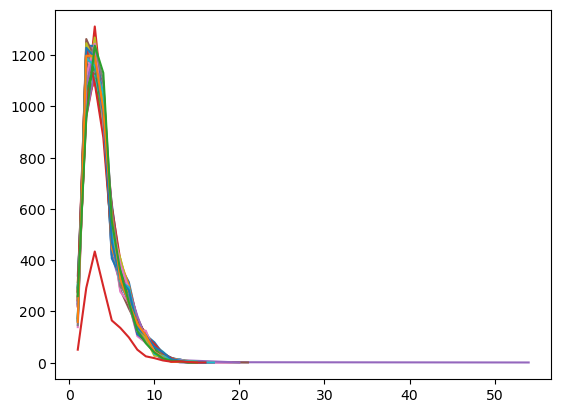

In [18]:
for i in occurrences:
    conditions = [ condition for condition, w in i]
    counts = [ sum(w.values()) for condition, w in i ]
    _ = sns.lineplot(x=conditions, y=counts)